In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('./finalData/final_preprocessed.csv', encoding='latin1')

Frequency of Top Tags


In [6]:
# Assuming df['Tags'] is a list of tags
all_tags = [tag for tags in df['Tags'] for tag in tags.split()]
tag_counts = Counter(all_tags)

# Top 10 tags
top_tags = tag_counts.most_common(10)
print(top_tags)

[("['javascript',", 112411), ("['java',", 107362), ("['c#',", 95674), ("['php',", 85231), ("['android',", 62640), ("['python',", 57626), ("['c++',", 41426), ("'jquery',", 38509), ("['ios',", 35805), ("'html',", 29030)]


Distribution of Number of Tags Per Question


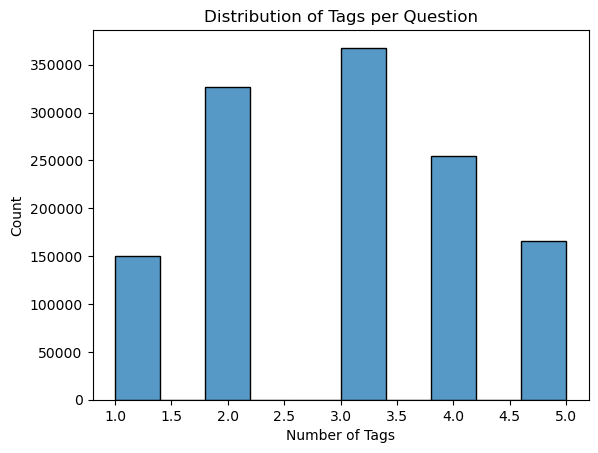

In [7]:
df['num_tags'] = df['Tags'].apply(lambda x: len(x.split()))
sns.histplot(df['num_tags'], bins=10)
plt.title("Distribution of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.show()

### Wordcloud of Tags

visual showing the most common tags from your dataset — bigger tags are more frequent


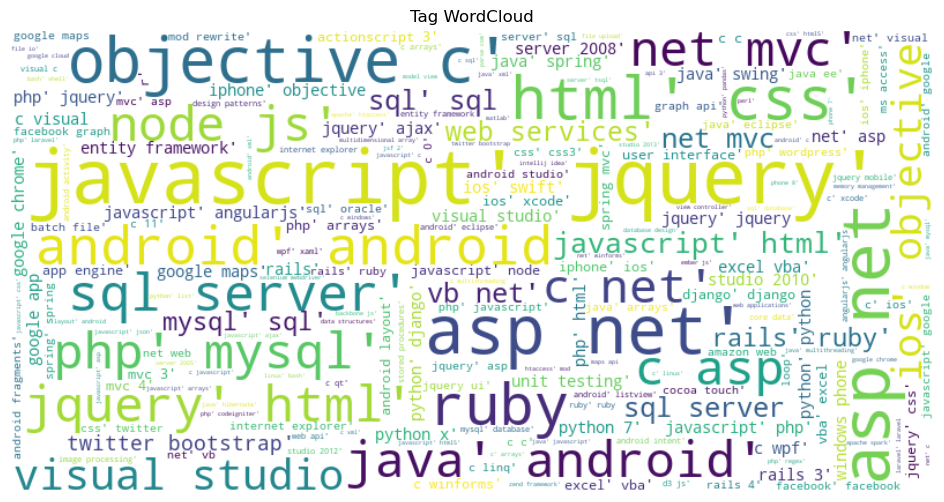

In [12]:
tags_text = ' '.join(all_tags)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tag WordCloud")
plt.show()

Look at Sample Questions per Tag


In [11]:
# For example, show 3 questions for the 'python' tag
sample_tag = 'javascript'

sample_df = df[df['Tags'].str.contains(sample_tag)]
sample_df.head()
# print(sample_df[['Title', 'Body']].head(3))

,clean_text,Tags,num_tags
79,kind task manager javascript firefox 3 recentl...,"['javascript', 'firefox', 'memory', 'cpu']",4
161,best practice managing deploying large javascr...,"['javascript', 'web-applications', 'deployment']",3
205,code ask yes/no question javascript could find...,['javascript'],1
207,best way keep ordered list window ( most-recen...,['javascript'],1
211,executing javascript flex : javascript functio...,"['javascript', 'flex', 'exploit']",3


In [14]:
sample_df.head().to_csv("hold.csv")